# Wine Quality Dataset Exploratory Data Analysis (EDA)

This notebook performs an Exploratory Data Analysis on the Wine Quality dataset. We will:
- Import the necessary libraries and load the dataset.
- Explore the data by checking its structure and plotting histograms.
- Calculate the skewness of each feature.
- Create Q-Q plots to assess normality.
- Apply a log transformation to a highly skewed feature as an example.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
# Remove the 'delimiter' argument if the file is comma-separated.
df = pd.read_csv("winequality-red.csv")

# Display the first few rows to verify that the file loaded correctly
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8

In [8]:
# Display detailed information about the DataFrame (data types, non-null counts, etc.)
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fixed acidity            1599 non-null   float64
 1   volatile acidity         1599 non-null   float64
 2   citric acid              1599 non-null   float64
 3   residual sugar           1599 non-null   float64
 4   chlorides                1599 non-null   float64
 5   free sulfur dioxide      1599 non-null   float64
 6   total sulfur dioxide     1599 non-null   float64
 7   density                  1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulphates                1599 non-null   float64
 10  alcohol                  1599 non-null   float64
 11  quality                  1599 non-null   int64  
 12  free_sulfur_dioxide_log  1599 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB
None


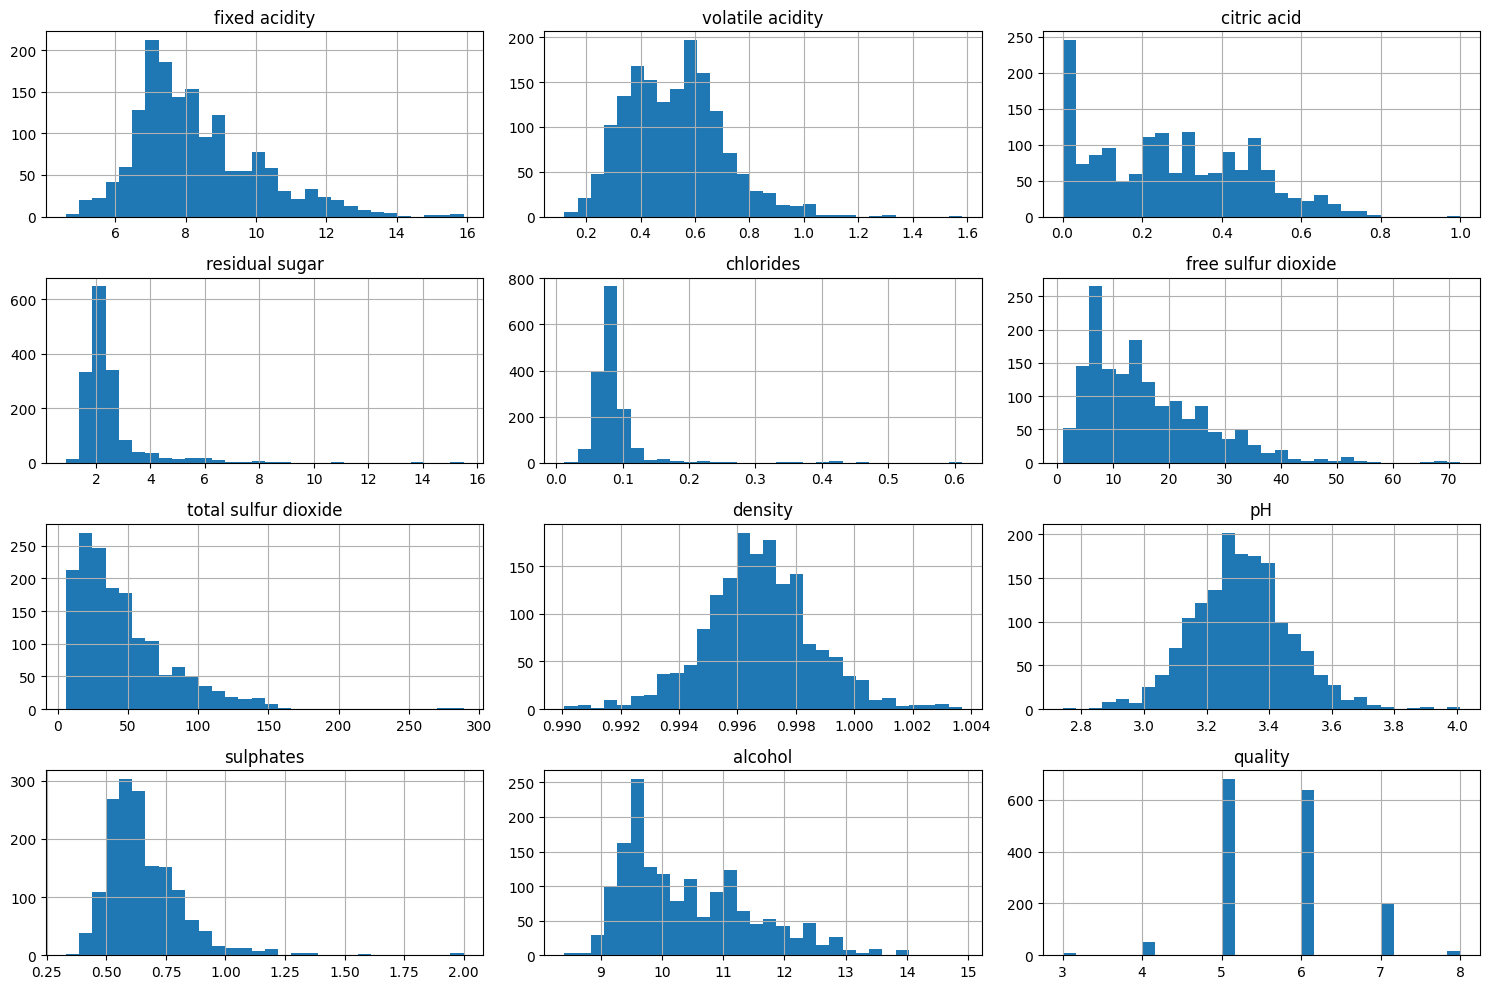

In [3]:
# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [4]:
# Calculate and print skewness for each column
print("Skewness of each feature:")
print(df.skew())

Skewness of each feature:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


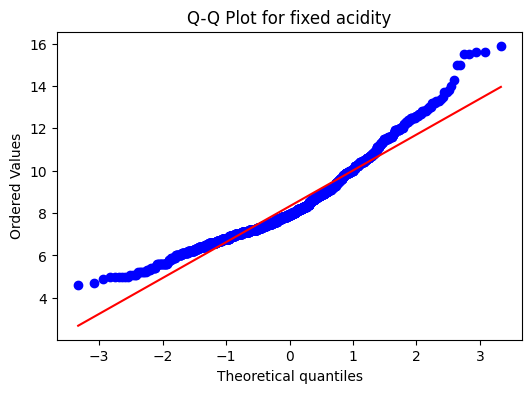

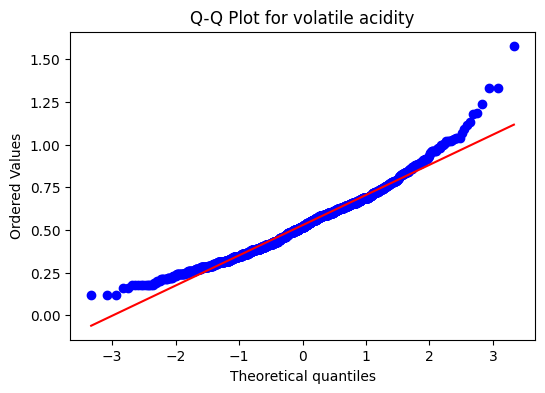

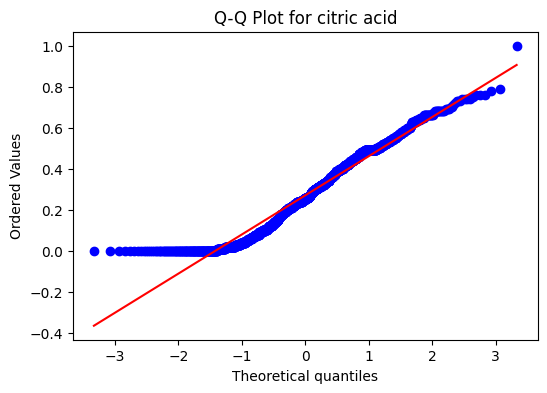

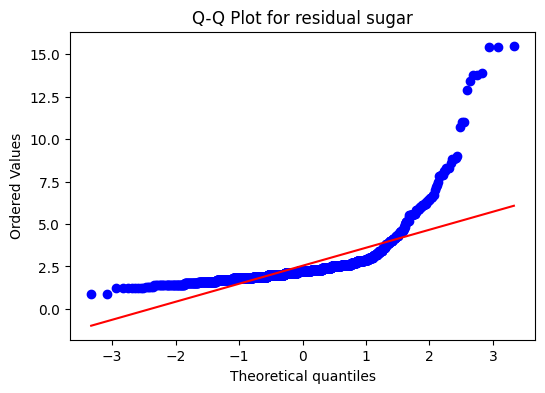

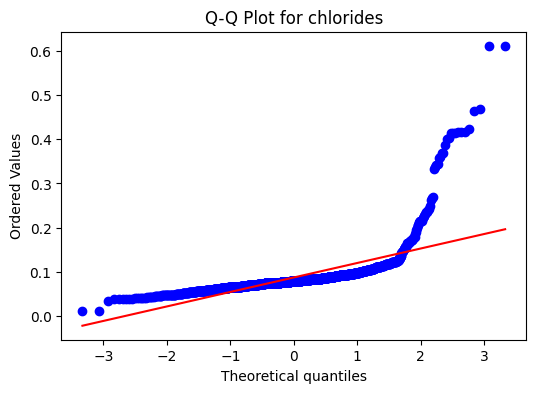

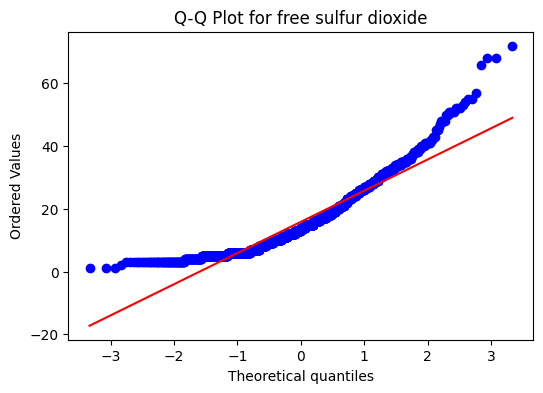

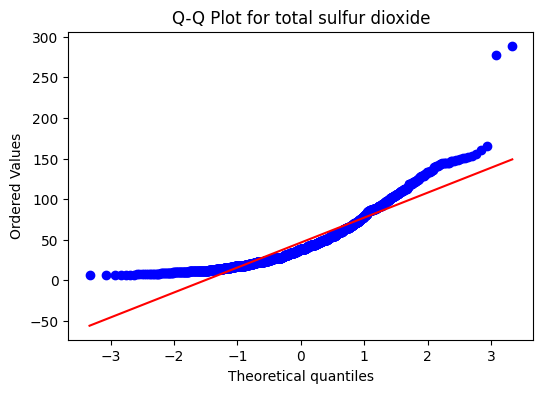

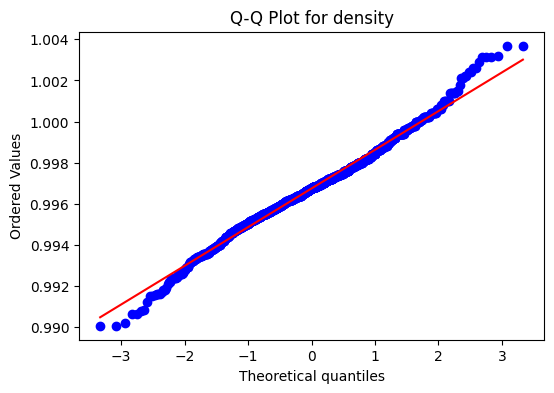

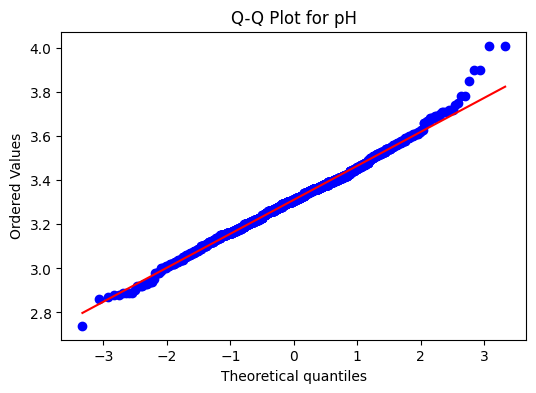

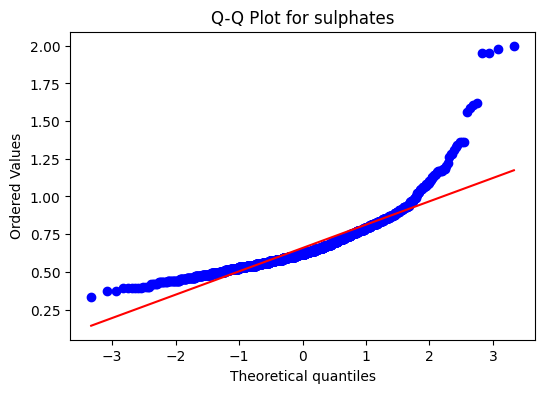

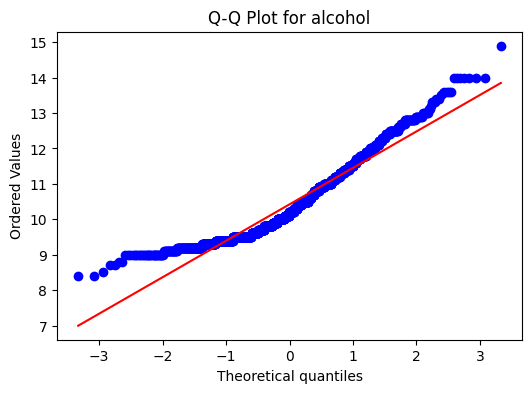

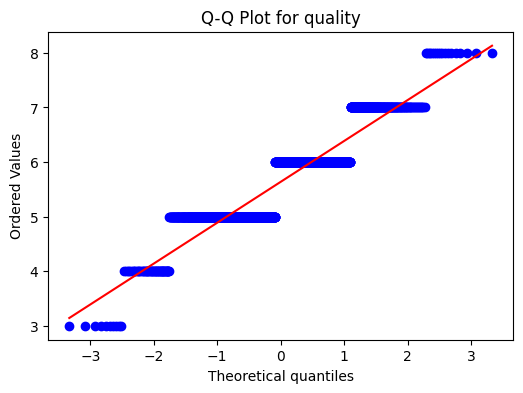

In [5]:
# Create Q-Q plots to assess normality for each feature
for column in df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")
    plt.show()


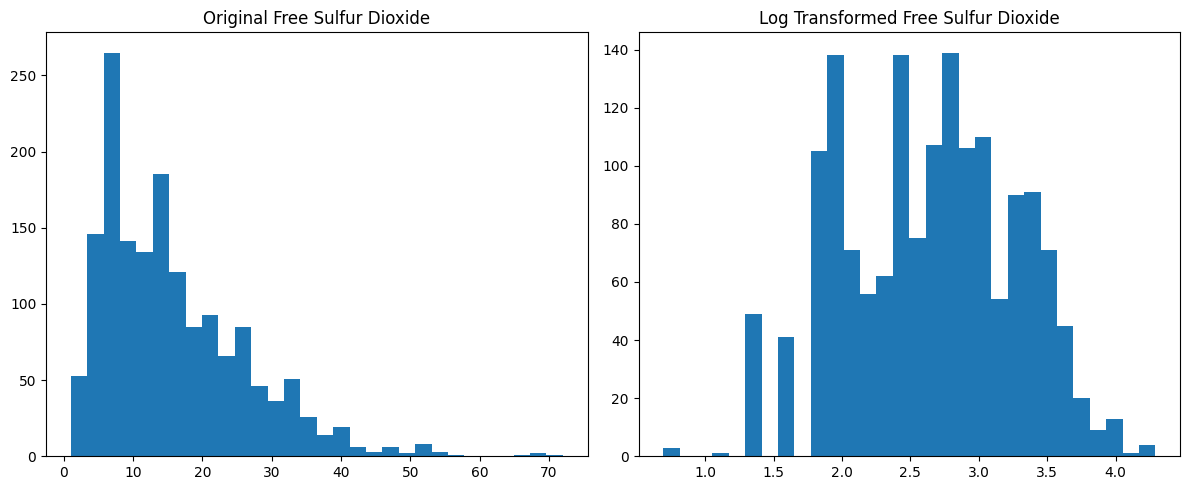

Skewness before transformation: 1.250567293314441
Skewness after log transformation: -0.09739886917867456


In [6]:
# Example: Apply a log transformation to the "free sulfur dioxide" feature if it exists
if 'free sulfur dioxide' in df.columns:
    df['free_sulfur_dioxide_log'] = np.log1p(df['free sulfur dioxide'])

    # Compare original and log-transformed distributions
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df['free sulfur dioxide'], bins=30)
    plt.title("Original Free Sulfur Dioxide")

    plt.subplot(1, 2, 2)
    plt.hist(df['free_sulfur_dioxide_log'], bins=30)
    plt.title("Log Transformed Free Sulfur Dioxide")

    plt.tight_layout()
    plt.show()

    # Print skewness values before and after the transformation
    original_skew = df['free sulfur dioxide'].skew()
    transformed_skew = df['free_sulfur_dioxide_log'].skew()
    print("Skewness before transformation:", original_skew)
    print("Skewness after log transformation:", transformed_skew)
else:
    print("Column 'free sulfur dioxide' not found in the dataset.")


# Conclusion

The exploratory analysis shows the distribution of each feature in the Wine Quality dataset. Some features, such as **free sulfur dioxide**, may exhibit non-normality as indicated by high skewness and deviations from the straight line in the Q-Q plots. A logarithmic transformation (using `np.log1p`) can help reduce skewness and bring the distribution closer to normal, which is useful for many statistical analyses and machine learning algorithms.
